In [27]:
import pandas as pd
data  = pd.read_excel('2017捷運人流_日期時間合併.xlsx')
data.head()

,Date,時段,Station,出站,CrowdFlow
0,2017-01-01 0:00:00,0,BL板橋,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,361
1,2017-01-01 0:00:00,0,七張,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,56
2,2017-01-01 0:00:00,0,三和國中,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,52
3,2017-01-01 0:00:00,0,三民高中,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,38
4,2017-01-01 0:00:00,0,三重,松山機場中山國中南京復興忠孝復興大安科技大樓六張犁麟光辛亥萬芳醫院萬芳社區木柵動物園大直劍南...,35


In [32]:
data['Date'] = pd.to_datetime(data['Date']).dt.date
data

,Date,時段,Station,CrowdFlow
0,2017-01-01,0,BL板橋,361
1,2017-01-01,0,七張,56
2,2017-01-01,0,三和國中,52
3,2017-01-01,0,三民高中,38
4,2017-01-01,0,三重,35
...,...,...,...,...
828139,2018-01-01,5,頂埔,56
828140,2018-01-01,5,頂溪,200
828141,2018-01-01,5,頭前庄,17
828142,2018-01-01,5,麟光,45


In [51]:
data_station = data.groupby('Station').sum('CrowFlow')
data_station = data_station.drop('時段',axis=1)
data_station

,CrowdFlow
Station,
BL板橋,14468166
七張,5792604
三和國中,4267114
三民高中,4308973
三重,2074114
...,...
頂埔,2747269
頂溪,12601619
頭前庄,1731437


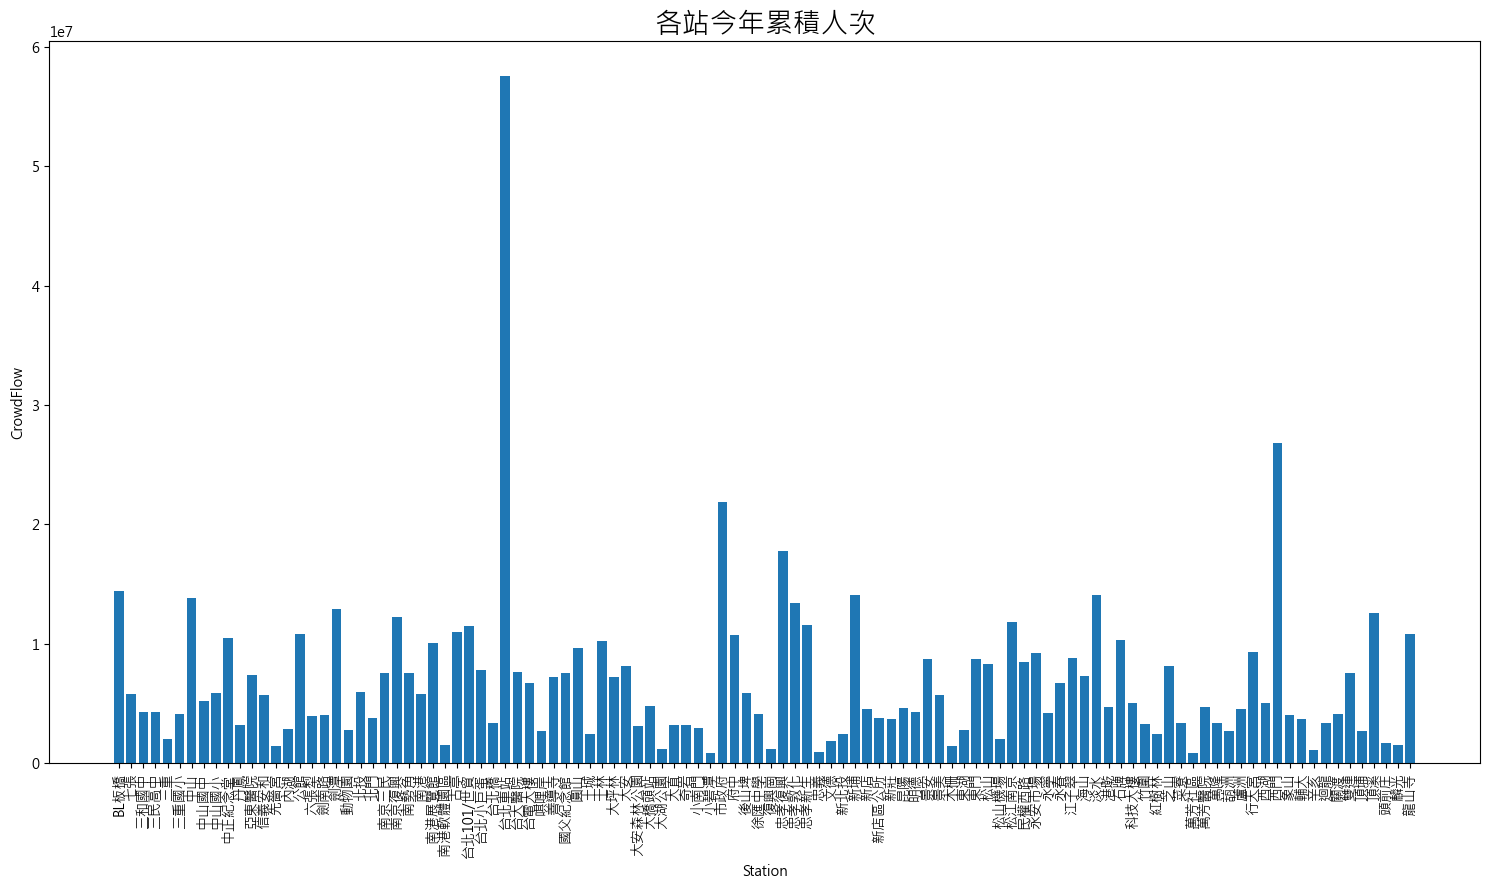

In [79]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')

x = data_station['CrowdFlow'].values
stations = data_station.index

plt.figure(figsize=(15, 9))

plt.title('各站今年累積人次', fontsize=20)
plt.bar(stations, x)
plt.xlabel('Station')
plt.ylabel('CrowdFlow')
plt.xticks(range(len(stations)), stations, rotation=90)
plt.subplots_adjust(bottom=0.3)

plt.tight_layout()
plt.show()

### 可以發現台北車站的人數遠超其他站點，其原因我想肯定與該站還有台鐵高鐵及轉運站有一定關係

In [108]:
data_station['CrowdFlow'].describe().astype(int)

count         108
mean      6900915
std       6663938
min        838170
25%       3247069
50%       5067220
75%       8788843
max      57556257
Name: CrowdFlow, dtype: int32

In [92]:
data_time = data.groupby('時段').sum('CrowdFlow')
data_time = data_time.drop([1, 2, 3, 4, 5])
data_time

# 凌晨時段有人是因為當天為跨年
# 根據台北捷運官方網站，正常來說首班車發車為早上六點，末班車為晚上十二點發車，所以我們的分析的部分只抓[0,6~23]這個時段的人流

,CrowdFlow
時段,
0,5180548
6,9707684
7,37121889
8,68069586
9,43003092
10,32300468
11,32790576
12,35763011
13,38195110


In [107]:
data_time['CrowdFlow'].describe().astype(int)

count          19
mean     39204109
std      18324496
min       5180548
25%      34165802
50%      37121889
75%      42705124
max      79498801
Name: CrowdFlow, dtype: int32

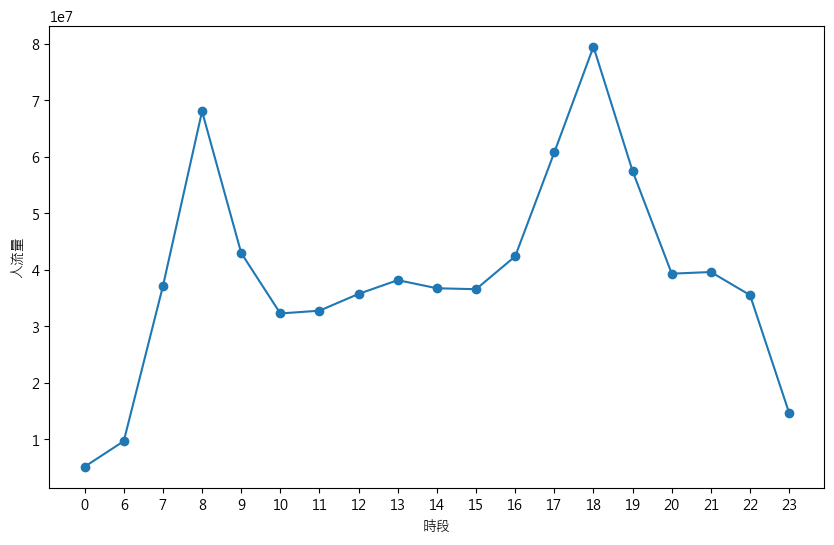

''

In [103]:
import matplotlib.pyplot as plt

x = data_time.index.astype(str)  
y = data_time['CrowdFlow']  

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
plt.xlabel('時段')
plt.ylabel('人流量')
plt.xticks(x)


plt.show()

'''
還未區分假日平日的狀況下，可發先時段早上為8點至9點，晚上的4點一路到9點的累積人流都高於平均數
傍晚時段比早上時段明顯還要多人，可約略猜測不論早上幾點出門，回去的時間其實整個大台北地區還是相當集中的
'''
